In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import os
from PIL import Image
import pathlib
import csv
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import tensorflow as tf
# from tensorflow import keras
import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
from keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
import warnings
warnings.filterwarnings("ignore")

#Testing a single audio

In [ ]:
audio_path= "/content/1.WAV"

In [ ]:
y, sr= librosa.load(audio_path, sr=44100) 

In [ ]:
y

array([-0.91308665, -1.0151442 , -0.9470185 , ...,  0.89196694,
        1.0728346 ,  0.        ], dtype=float32)

In [ ]:
sr

44100

In [ ]:
ipd.Audio(y, rate=sr)

##Visualizing Audio:

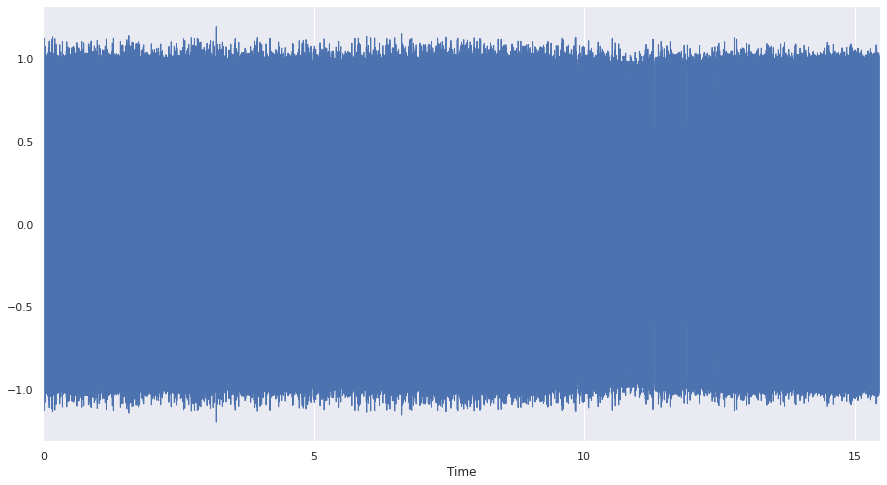

In [ ]:
fig=plt.gcf()
fig.set_size_inches((15,8))
librosa.display.waveplot(y, sr=sr)
plt.show()

## Spectrogram

### Short Time Fourier Transform (stft) 

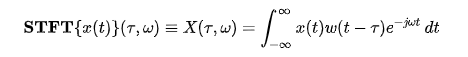

In [ ]:
# finding short time fourier transform
Y= librosa.stft(y)

# It converts signals such that we can know the amplitude of the given frequency at a given time.
# Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.
# also converts it into time-frequency domain

In [ ]:
y

array([-0.91308665, -1.0151442 , -0.9470185 , ...,  0.89196694,
        1.0728346 ,  0.        ], dtype=float32)

In [ ]:
len(y)

682562

In [ ]:
len(Y)

1025

In [ ]:
# converting amplitude spectrogram to db-scaled spectrogram
Ydb= librosa.amplitude_to_db(abs(Y))

In [ ]:
Ydb

array([[ 50.301086 ,  50.908646 ,  52.67449  , ...,  50.294464 ,
         48.37156  ,  51.302876 ],
       [ 44.30779  ,  43.6406   ,  48.735695 , ...,  48.411716 ,
         35.877224 ,  50.04432  ],
       [ 34.80902  ,  37.537033 ,  42.812992 , ...,  46.3366   ,
         44.61064  ,  46.003395 ],
       ...,
       [ -5.5639553, -11.595649 , -22.508522 , ..., -22.508522 ,
         -5.037652 ,   2.8007731],
       [ -5.6103873, -11.627798 , -22.508522 , ..., -22.508522 ,
         -5.0436096,   2.803176 ],
       [ -5.624379 , -11.666811 , -22.508522 , ..., -22.508522 ,
         -5.0705533,   2.794348 ]], dtype=float32)

In [ ]:
Ydb.shape

(1025, 1334)

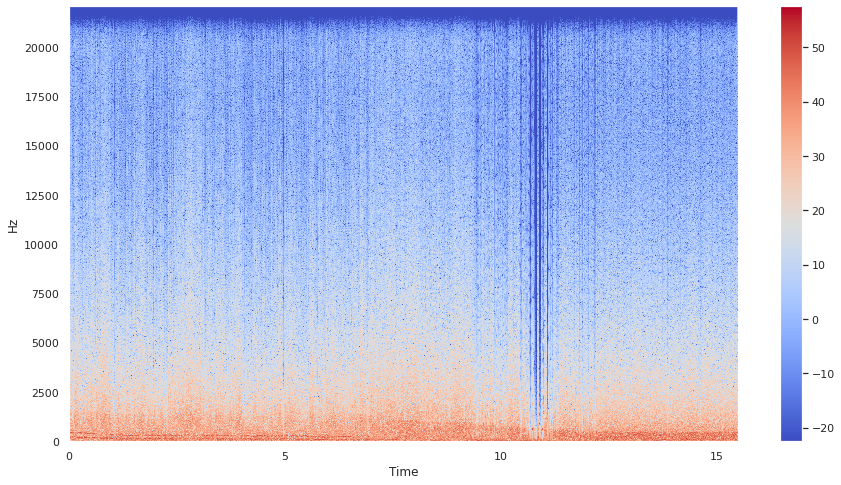

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,8)
librosa.display.specshow(Ydb, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

In [ ]:
np.log(Ydb)

array([[3.9180267, 3.9300327, 3.9641314, ..., 3.917895 , 3.878912 ,
        3.9377468],
       [3.7911606, 3.7759879, 3.8864117, ..., 3.879742 , 3.5801027,
        3.912909 ],
       [3.5498767, 3.625328 , 3.7568417, ..., 3.8359323, 3.7979724,
        3.8287153],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
        1.0298955],
       [      nan,       nan,       nan, ...,       nan,       nan,
        1.030753 ],
       [      nan,       nan,       nan, ...,       nan,       nan,
        1.0275987]], dtype=float32)

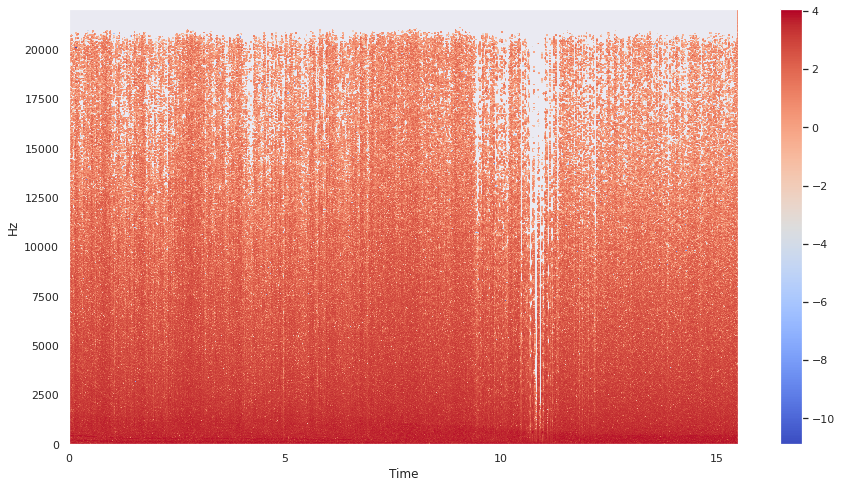

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,8)
librosa.display.specshow(np.log(Ydb), sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

# **Feature Extraction **

## **1- Spectral Centroid**

#### The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:

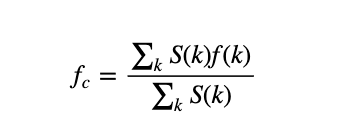

#### where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.



In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=y,sr=sr)[0]

In [ ]:
spectral_centroids

array([2569.37274465, 2832.629624  , 2837.0272489 , ..., 2505.57992788,
       2626.83322616, 2847.11282156])

In [ ]:
spectral_centroids.shape

(1334,)

#### spectral_centroid will return an array with columns equal to a number of frames present in the sample.

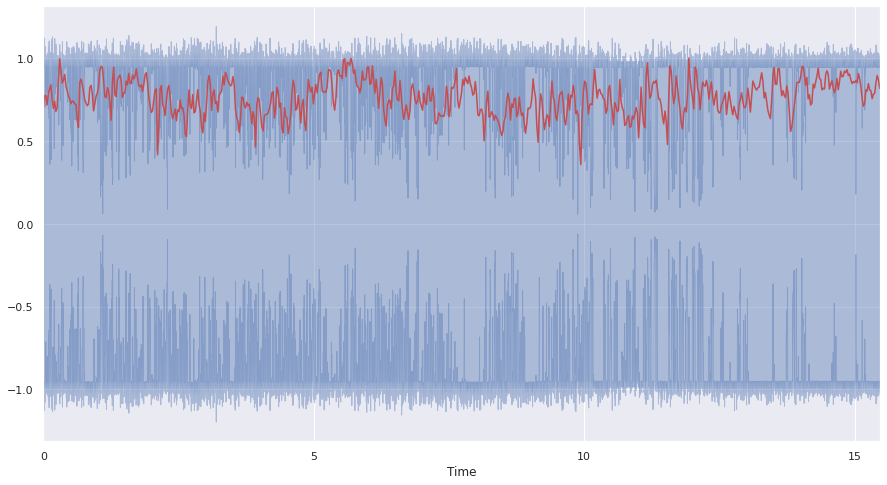

In [ ]:
# Computing the time variable for visualization
fig= plt.gcf()
fig.set_size_inches((15,8))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

## **2- Spectral Rolloff**

#### It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

In [ ]:
spectral_rolloff =  librosa.feature.spectral_rolloff(y=y+0.01, sr=sr)[0]

In [ ]:
spectral_rolloff

array([5275.63476562, 6029.296875  , 6115.4296875 , ..., 5211.03515625,
       5361.76757812, 5964.69726562])

In [ ]:
spectral_rolloff.shape

(1334,)

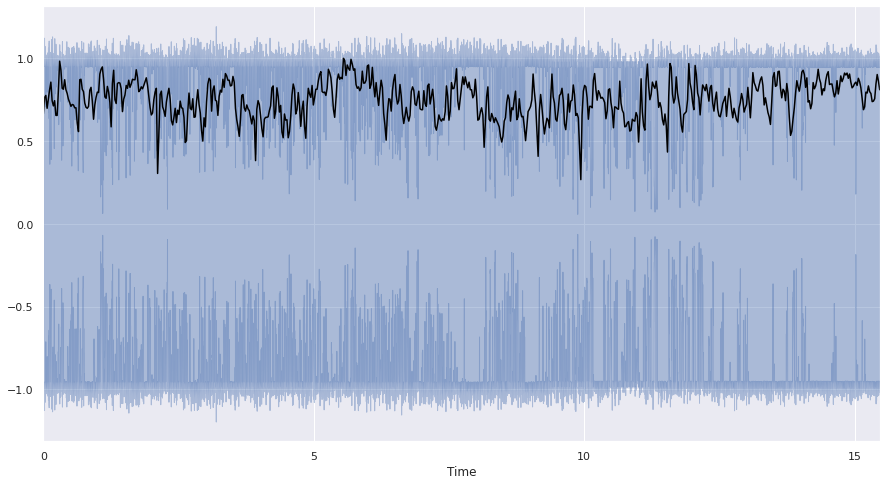

In [ ]:
fig= plt.gcf()
fig.set_size_inches((15,8))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='black')
plt.show()

##**3- Spectral Bandwidth**

####The spectral bandwidth is defined as the extent of the power transfer function around the center frequency.
####It is the width of the band of sound at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

####It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value.

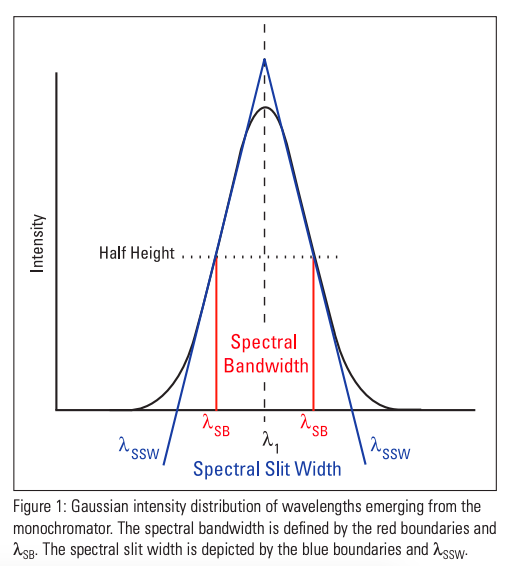

In [ ]:
spectral_bandwidth_2= librosa.feature.spectral_bandwidth(y=y, sr=sr, p=2)[0]
spectral_bandwidth_3= librosa.feature.spectral_bandwidth(y=y, sr=sr, p=3)[0]
spectral_bandwidth_4= librosa.feature.spectral_bandwidth(y=y, sr=sr, p=4)[0]

In [ ]:
spectral_bandwidth_2.shape

(1334,)

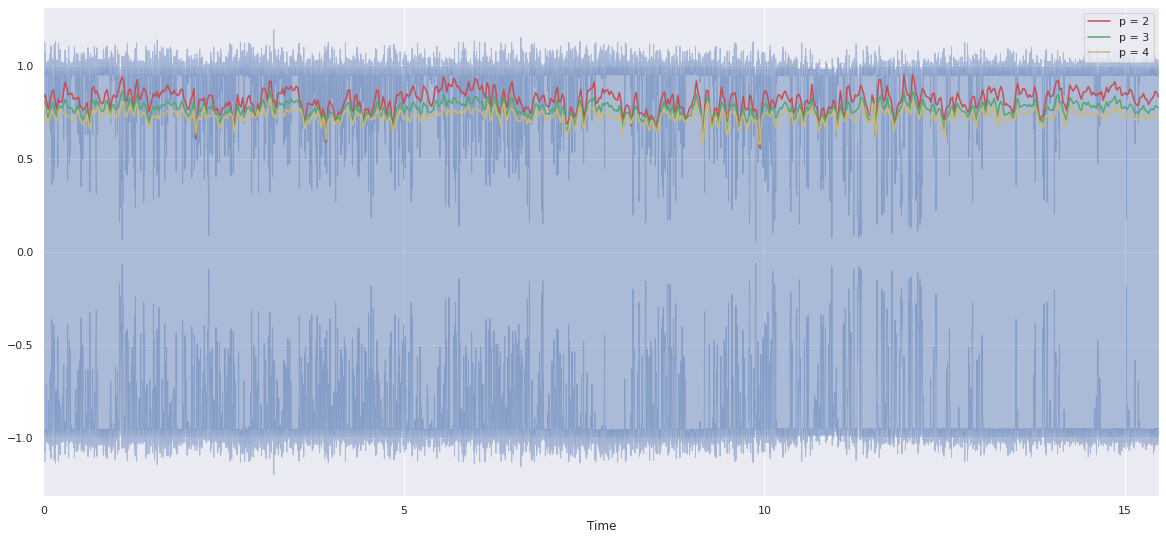

In [ ]:
fig= plt.gcf()
fig.set_size_inches((20,9))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color="r")
plt.plot(t, normalize(spectral_bandwidth_3), color="g")
plt.plot(t, normalize(spectral_bandwidth_4), color="y")
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.show()

##**4- Zero-Crossing Rate**

#### The zero-crossing rate is a measure for the high frequency content of a signal.

####A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

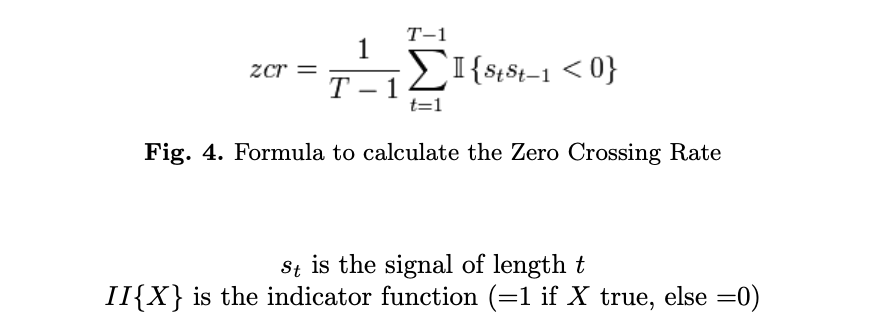

In [ ]:
y, sr = librosa.load(audio_path, sr=44100)

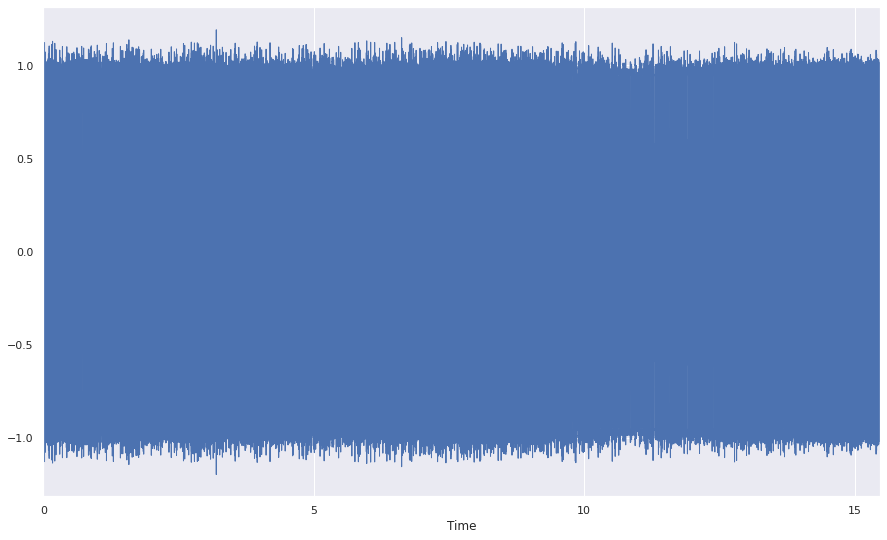

In [ ]:
fig= plt.gcf()
fig.set_size_inches((15,9))
librosa.display.waveplot(y, sr=sr)

In [ ]:
zero_crossings = librosa.zero_crossings(y, pad=False)

In [ ]:
zero_crossings

array([False, False, False, ..., False, False, False])

In [ ]:
len(zero_crossings)

682562

In [ ]:
# Number of zero crossings within a segment of this signal
np.sum(zero_crossings)

10987

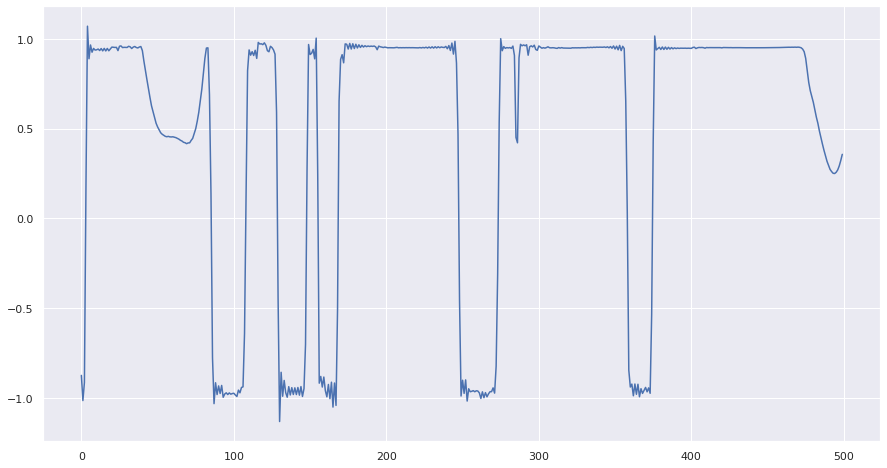

In [ ]:
# Taking a frame of this signal and checking the zero crossings
fig= plt.gcf()
fig.set_size_inches((15,8))
plt.plot(y[7000:7500])
plt.show()

In [ ]:
zero_crossings_11 = librosa.zero_crossings(y[7000:7500], pad=False)

In [ ]:
# verifying
np.sum(zero_crossings_11)

11

## **5- Mel-Frequency Cepstral Coefficients(MFCCs)**



#### The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

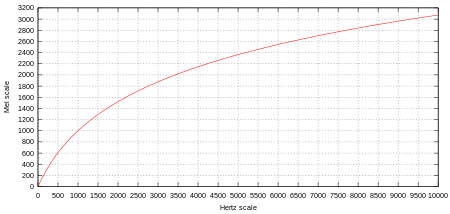

#### The mel-scale is a scale of pitches judged by listeners to be equal in distance from one another. The reference point between the mel-scale and normal frequency measurement is arbitrarily defined by assigning the perceptual pitch of 1000 mels to 1000 Hz. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. The name mel comes from the word melody to indicate the scale is based on pitch comparisons.
####The formula to convert f hertz into m mels is:

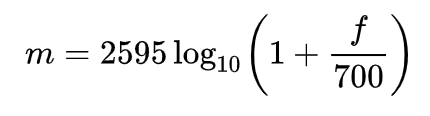

In [ ]:
mfcc= librosa.feature.mfcc(y=y, sr=sr)

In [ ]:
mfcc.shape

(20, 1334)

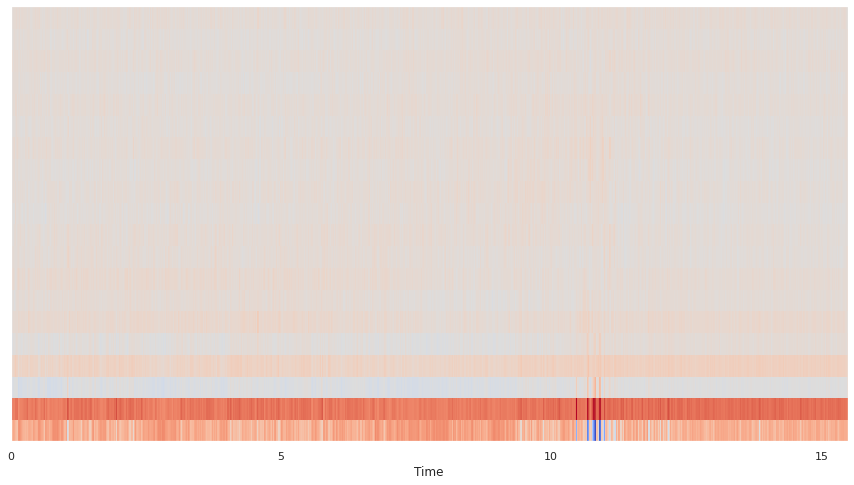

In [ ]:
#Displaying  the MFCCs:
fig= plt.gcf()
fig.set_size_inches((15,8))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.show()

##  **6- Chroma feature**

#### A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

In [ ]:
#hop length - The number of samples between successive frames, e.g., the columns of a spectrogram. This is denoted as a positive integer hop_length
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

In [ ]:
chromagram.shape

(12, 1334)

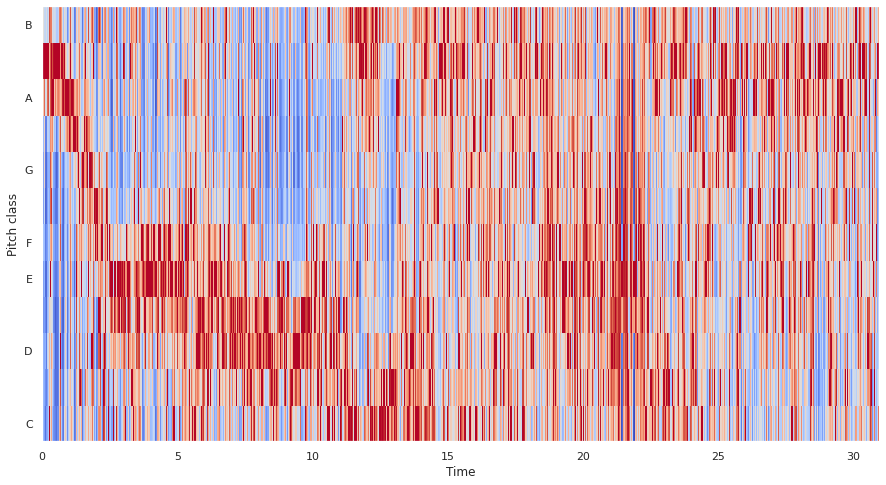

In [ ]:
fig= plt.gcf()
fig.set_size_inches((15,8))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
plt.show()

#**Drawing Spectrogram**

In [ ]:
# convert the audio data files into PNG format images or basically extracting the Spectrogram for every Audio
cmap = plt.get_cmap('magma')
fig= plt.gcf()
fig.set_size_inches((15,8))
train = 'aveh bveh gman sman'.split()

for t in train:
  pathlib.Path(f'img_data/{t}').mkdir(parents=True, exist_ok=True)
  for filename in os.listdir(f'./drive/My Drive/main_data/{t}'):
    audioname = f'./drive/My Drive/main_data/{t}/{filename}'
    y, sr = librosa.load(audioname, sr=44100, mono=True, duration=None)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'img_data/{t}/{filename[:-3].replace(".", "")}.png')
    plt.clf()

<Figure size 1080x576 with 0 Axes>

# Modelling

In [ ]:
# Now since all the audio files got converted into their respective spectrograms it’s easier to extract features.
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
print(header, end=" ")

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label'] 

In [ ]:
with open('dataset.csv', 'w', newline='') as new_file:
  writer = csv.writer(new_file)
  writer.writerow(header)
train = 'aveh bveh gman sman'.split()
for t in train:
  for filename in os.listdir(f'./drive/My Drive/main_data/{t}'):
    audioname = f'./drive/My Drive/main_data/{t}/{filename}'
    y, sr = librosa.load(audioname, sr=44100, mono=True, duration=None)
    rmse = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
            to_append += f' {np.mean(e)}'
    to_append += f' {t}'
    with open('dataset.csv', 'a', newline='') as new_file2:
      writer = csv.writer(new_file2)
      writer.writerow(to_append.split())

In [ ]:
# shutil.make_archive("imgdata", 'zip', base_dir= "/content/img_data")

'imgdata.zip'

In [ ]:
# import numpy as np
# import pandas as pd
# import sklearn
# import librosa
# import os
# from PIL import Image
# import pathlib
# import csv
# import pickle
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler


# class Model():
#     def preprocessing(self , audioname):
#         self.y, self.sr = librosa.load(audioname, sr=44100, mono=True, duration=None)
#         self.rmse = librosa.feature.rms(y=self.y)
#         self.chroma_stft = librosa.feature.chroma_stft(y=self.y, sr=self.sr)
#         self.spec_cent = librosa.feature.spectral_centroid(y=self.y, sr=self.sr)
#         self.spec_bw = librosa.feature.spectral_bandwidth(y=self.y, sr=self.sr)
#         self.rolloff = librosa.feature.spectral_rolloff(y=self.y, sr=self.sr)
#         self.zcr = librosa.feature.zero_crossing_rate(self.y)
#         self.mfcc = librosa.feature.mfcc(y=self.y, sr=self.sr)

#         self.data = pd.DataFrame({"chroma_stft" : [np.mean(self.chroma_stft)],
#                                   "rmse" : [np.mean(self.rmse)],
#                                   "spec_cent" : [np.mean(self.spec_cent)],
#                                   "spec_bw" : [np.mean(self.spec_bw)],
#                                   "rolloff" : [np.mean(self.rolloff)],
#                                   "zcr" : [np.mean(self.zcr)]})

#         for index, value in enumerate(self.mfcc):
#             self.data[f"mfcc_{index+1}"]  = np.mean(value)

#         with open("/content/scaler.pkl", "rb") as new_file1:
#           self.std_scaler = pickle.load(new_file1)
#         self.test_data = self.std_scaler.transform(np.array(self.data,  dtype = float))

#         with open("xgb_model.pkl", "rb") as new_file2:
#           self.xgb_model=pickle.load(new_file2)

#         self.result = self.xgb_model.predict(self.test_data)

#         result_map = {}
#         result_map["aveh"] = 0
#         result_map["bveh"] = 1
#         result_map["gman"] = 2
#         result_map["sman"] = 3

#         for class_name , value in result_map.items():
#           if (self.result[0] == value):
#             self.final_result = class_name
        
#         return self.final_result


# if (__name__ == "__main__"):
#     model_obj = Model()
#     print(model_obj.preprocessing("/content/REC10.WAV"))


gman


In [ ]:
import xgboost as xgb

xgb.__version__

'1.4.2'

In [ ]:
import sklearn as sk

sk.__version__

'0.24.2'

## **Data Preprocessing**

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

filename  chroma_stft      rmse  ...    mfcc19    mfcc20  label
0  REC001.WAV     0.631342  0.805327  ... -0.512697  2.584988   aveh
1  REC002.WAV     0.491550  0.890586  ... -1.893409  1.416340   aveh
2  REC003.WAV     0.597668  0.824389  ... -1.308947  1.832281   aveh
3  REC004.WAV     0.628489  0.849342  ... -1.687384  2.091869   aveh
4  REC005.WAV     0.489307  0.853557  ... -2.588848  1.516891   aveh

[5 rows x 28 columns]

In [ ]:
data.drop("filename", axis=1, inplace=True) # Encoding the Labels

In [ ]:
target_list = data.iloc[:, -1]

In [ ]:
target_list

0       aveh
1       aveh
2       aveh
3       aveh
4       aveh
        ... 
2405    sman
2406    sman
2407    sman
2408    sman
2409    sman
Name: label, Length: 2410, dtype: object

In [ ]:
# Target Incidence
target_list.value_counts(normalize=True)

sman    0.278838
bveh    0.249378
gman    0.243983
aveh    0.227801
Name: label, dtype: float64

In [ ]:
target_list.unique()

array(['aveh', 'bveh', 'gman', 'sman'], dtype=object)

In [ ]:
lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(target_list) # Scaling the Feature columns

In [ ]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
X=data.iloc[:, :-1]

In [ ]:
X

In [ ]:
# X_test

In [ ]:
# t1 = np.array(X_test.iloc[1,:]).reshape(1,len(X_test.iloc[1,:]))
# t1

In [ ]:
# Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(X_train, dtype = float))
# after this we can save this standard scaler model for scaling the test data in future
X_test = scaler.transform(np.array(X_test,  dtype = float)) 

In [ ]:
# scal_t1 = scaler.transform(t1)
# scal_t1

In [ ]:
# with open("scaler.pkl", "wb") as new_file1:
#   pickle.dump(scaler, new_file1)

In [ ]:
# with open("scaler.pkl","rb") as new_file2:
#   std_scaler= pickle.load(new_file2)

In [ ]:
len(X_train)

1928

In [ ]:
X_train.shape

(1928, 26)

In [ ]:
len(X_test)

482

In [ ]:
X_test.shape

(482, 26)

In [ ]:
# scaler = StandardScaler()
# X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float)) # Dividing data into training, Testing and validation set
# X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, test_size=0.2, random_state=1)

##Building Model

### Building an ANN model

In [ ]:
# model = Sequential()
# model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(6, activation='softmax'))
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# modelchekpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
# earlystopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
# classifier = model.fit(X_train,
#                     y_train,
#                     epochs=100,
#                     batch_size=128
#                     # validation_data= (X_valid, y_valid),
#                     # callbacks= [modelchekpoint_cb, earlystopping_cb]
#                     )

In [ ]:
# model.evaluate(X_test,y_test, batch_size=128)

In [ ]:
# fig=plt.gcf()
# fig.set_size_inches((15,6))
# plt.plot(pd.DataFrame(classifier.history))
# plt.legend(labels=["loss","accuracy"])
# plt.grid(True)
# plt.show()

###Checking the variance of the derived data

In [ ]:
X.head()

chroma_stft      rmse  spectral_centroid  ...    mfcc18    mfcc19    mfcc20
0     0.631342  0.805327        2330.083187  ...  2.938559 -0.512697  2.584988
1     0.491550  0.890586        2990.726862  ...  1.018864 -1.893409  1.416340
2     0.597668  0.824389        2022.088433  ...  1.961235 -1.308947  1.832281
3     0.628489  0.849342        2454.845080  ...  1.579935 -1.687384  2.091869
4     0.489307  0.853557        2612.220966  ...  0.363334 -2.588848  1.516891

[5 rows x 26 columns]

In [ ]:
X.var()

chroma_stft           1.746098e-02
rmse                  2.930410e-02
spectral_centroid     4.739934e+05
spectral_bandwidth    4.476143e+05
rolloff               2.697327e+06
zero_crossing_rate    1.565418e-04
mfcc1                 1.200920e+04
mfcc2                 4.233915e+02
mfcc3                 3.777040e+02
mfcc4                 4.851244e+01
mfcc5                 5.146700e+01
mfcc6                 1.959903e+01
mfcc7                 1.340769e+01
mfcc8                 1.033589e+01
mfcc9                 8.254017e+00
mfcc10                8.344300e+00
mfcc11                4.521093e+00
mfcc12                5.801399e+00
mfcc13                4.006815e+00
mfcc14                7.356274e+00
mfcc15                4.851608e+00
mfcc16                9.105161e+00
mfcc17                6.381592e+00
mfcc18                1.149031e+01
mfcc19                7.736466e+00
mfcc20                1.328573e+01
dtype: float64

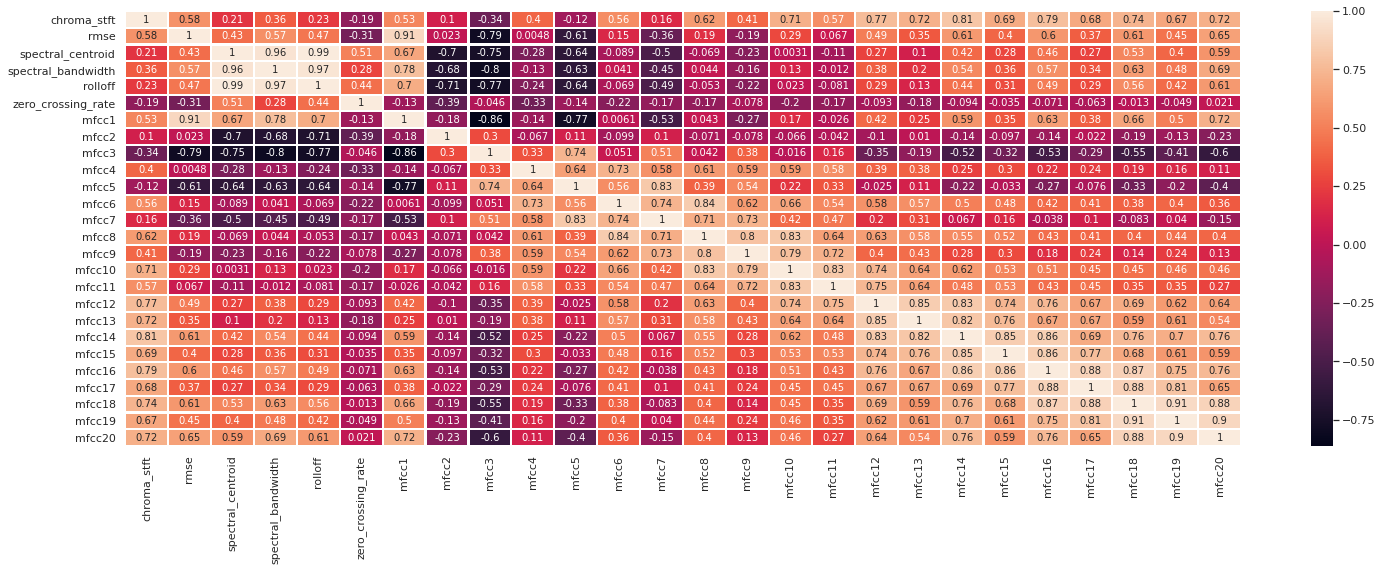

In [ ]:
# checking the co-relation between the different features of sound/signal
fig= plt.gcf()
fig.set_size_inches((25,8))
sns.heatmap(X.corr(), annot=True, linewidths=1.1)
plt.show()

### ML Models

In [ ]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### **1- Naive Bayes Classifier**

In [ ]:
nb= GaussianNB()
nb.fit(X_train, y_train) # we can save this model for predicting more audios in future

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
## Storing the trained model for future prediction

# with open("nb_model.pkl", "wb") as new_file3:
  # pickle.dump(nb, new_file3)

In [ ]:
## Loading the Pre-Trained model

# with open("nb_model.pkl", "rb") as new_file1:
#   model=pickle.load(new_file1)

In [ ]:
# model.predict(X_test)

In [ ]:
# Predicting and checking different metrics

d={}
pred_train_y=nb.predict(X_train)
d["pred_train_y"]=pred_train_y
    
pred_test_y=nb.predict(X_test)
d["pred_test_y"]=pred_test_y

print("\033[1m  Accuracy Score :-  \033[0m\n")
    
print("For Training Set :-")
print(f"Accuracy_Score = {metrics.accuracy_score(y_train,pred_train_y)}")
d["Accuracy_Score_train"]=metrics.accuracy_score(y_train,pred_train_y)
    
print("For Testing Set :-")
print(f"Accuracy_Score = {metrics.accuracy_score(y_test,pred_test_y)}\n")
d["Accuracy_Score_test"]=metrics.accuracy_score(y_test,pred_test_y)

print("-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------")

print("\033[1m  Precision Score :-  \033[0m\n")

print("For Training Set :-")
print(f"Pricision_Score = {precision_score(y_train,pred_train_y, average='weighted')}")
d["Pricision_Score_train"]=precision_score(y_train,pred_train_y, average='weighted')
    
print("For Testing Set :-")
print(f"Pricision_Score = {precision_score(y_test,pred_test_y, average='weighted')}\n")
d["Pricision_Score_test"]=precision_score(y_test,pred_test_y, average='weighted')

print("-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------")

print("\033[1m  Recall Score :-  \033[0m\n")

print("For Training Set :-")
print(f"Recall_Score = {recall_score(y_train,pred_train_y, average='weighted')}")
d["Recall_Score_train"]=recall_score(y_train,pred_train_y, average='weighted')
    
print("For Testing Set :-")
print(f"Recall_Score = {recall_score(y_train,pred_train_y, average='weighted')}\n")
d["Recall_Score_test"]=recall_score(y_test,pred_test_y, average='weighted')

  Accuracy Score :-  

For Training Set :-
Accuracy_Score = 0.6011410788381742
For Testing Set :-
Accuracy_Score = 0.6265560165975104

-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------
  Precision Score :-  

For Training Set :-
Pricision_Score = 0.6215550405280534
For Testing Set :-
Pricision_Score = 0.6418862405291667

-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------
  Recall Score :-  

For Training Set :-
Recall_Score = 0.6011410788381742
For Testing Set :-
Recall_Score = 0.6011410788381742



##### **Cross Validation for Naive Bayes Classifier**

In [ ]:
# Cross checking our results by using K-Fold cross validation
results= cross_validate(nb, X_train, y_train, scoring=["accuracy", "precision_weighted", "recall_weighted"], cv=10, n_jobs=-1)

In [ ]:
results

{'fit_time': array([0.00279641, 0.00378585, 0.00227237, 0.00261331, 0.0024941 ,
        0.00237656, 0.00247073, 0.00229216, 0.00251579, 0.00177979]),
 'score_time': array([0.00347638, 0.00317955, 0.00321341, 0.00448251, 0.00284147,
        0.00551748, 0.00321817, 0.01033092, 0.0034852 , 0.00210929]),
 'test_accuracy': array([0.64248705, 0.6373057 , 0.56476684, 0.61658031, 0.56994819,
        0.56994819, 0.58549223, 0.62176166, 0.61458333, 0.578125  ]),
 'test_precision_weighted': array([0.66375902, 0.6502695 , 0.59989955, 0.6326375 , 0.60001045,
        0.58067389, 0.60884354, 0.6468206 , 0.63752438, 0.59482955]),
 'test_recall_weighted': array([0.64248705, 0.6373057 , 0.56476684, 0.61658031, 0.56994819,
        0.56994819, 0.58549223, 0.62176166, 0.61458333, 0.578125  ])}

In [ ]:
# validated accuracy score
np.mean(results['test_accuracy'])

0.6000998488773747

In [ ]:
# validated precision score
np.mean(results['test_precision_weighted'])

0.6215267961725959

In [ ]:
# validated recall score
np.mean(results['test_recall_weighted'])

0.6000998488773747

#### **2- Xtreme Gradient Boosting (XG-Boost)**

In [ ]:
xgb_classifier= XGBClassifier(n_estimators=100, n_jobs=-1, verbosity=1, random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
## Storing the trained model for future prediction

# import pickle

# with open("xgb_model.pkl", "wb") as new_file:
#   pickle.dump(nb, new_file)

In [ ]:
## Loading the Pre-Trained model

# with open("xgb_model.pkl", "rb") as new_file1:
#   xgb_model=pickle.load(new_file1)

In [ ]:
# xgb_model.predict(X_test)

##### **Checking the rank of the features**

In [ ]:
# Ranking of all the features according to their contribution in the final model

rank= 1
features_list = [(i,j) for i,j in zip(list(X.columns), list(xgb_classifier.feature_importances_))]
for feature_name , contribution_value in sorted(features_list, key=lambda b:b[1], reverse=True):
  print(f"{rank} - {feature_name}  :    {contribution_value}")
  rank+=1

1 - chroma_stft  :    0.11705127358436584
2 - mfcc5  :    0.09843207150697708
3 - mfcc10  :    0.09684403240680695
4 - rmse  :    0.08649323880672455
5 - mfcc17  :    0.07625562697649002
6 - mfcc1  :    0.07588651776313782
7 - mfcc12  :    0.05624837055802345
8 - mfcc18  :    0.04331941902637482
9 - mfcc2  :    0.037604887038469315
10 - mfcc3  :    0.03504085913300514
11 - mfcc16  :    0.033380813896656036
12 - mfcc14  :    0.02574201114475727
13 - mfcc20  :    0.02515540085732937
14 - mfcc15  :    0.020365141332149506
15 - spectral_bandwidth  :    0.020137900486588478
16 - mfcc4  :    0.01824270188808441
17 - mfcc8  :    0.018038272857666016
18 - mfcc19  :    0.015915730968117714
19 - mfcc11  :    0.01511587854474783
20 - mfcc9  :    0.013986535370349884
21 - zero_crossing_rate  :    0.01288523431867361
22 - mfcc6  :    0.012592865154147148
23 - spectral_centroid  :    0.012002430856227875
24 - mfcc13  :    0.011313161812722683
25 - rolloff  :    0.011259611696004868
26 - mfcc7  :    

In [ ]:
# Predicting and checking different metrics

f={}
pred_train_y=xgb_classifier.predict(X_train)
f["pred_train_y"]=pred_train_y
    
pred_test_y=xgb_classifier.predict(X_test)
f["pred_test_y"]=pred_test_y

print("\033[1m  Accuracy Score :-  \033[0m\n")
    
print("For Training Set :-")
print(f"Accuracy_Score = {metrics.accuracy_score(y_train,pred_train_y)}")
f["Accuracy_Score_train"]=metrics.accuracy_score(y_train,pred_train_y)
    
print("For Testing Set :-")
print(f"Accuracy_Score = {metrics.accuracy_score(y_test,pred_test_y)}\n")
f["Accuracy_Score_test"]=metrics.accuracy_score(y_test,pred_test_y)

print("-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------")

print("\033[1m  Precision Score :-  \033[0m\n")

print("For Training Set :-")
print(f"Pricision_Score = {precision_score(y_train,pred_train_y, average='weighted')}")
f["Pricision_Score_train"]=precision_score(y_train,pred_train_y, average='weighted')
    
print("For Testing Set :-")
print(f"Pricision_Score = {precision_score(y_test,pred_test_y, average='weighted')}\n")
f["Pricision_Score_test"]=precision_score(y_test,pred_test_y, average='weighted')

print("-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------")

print("\033[1m  Recall Score :-  \033[0m\n")

print("For Training Set :-")
print(f"Recall_Score = {recall_score(y_train,pred_train_y, average='weighted')}")
f["Recall_Score_train"]=recall_score(y_train,pred_train_y, average='weighted')
    
print("For Testing Set :-")
print(f"Recall_Score = {recall_score(y_train,pred_train_y, average='weighted')}\n")

f["Recall_Score_test"]=recall_score(y_test,pred_test_y, average='weighted')

  Accuracy Score :-  

For Training Set :-
Accuracy_Score = 0.9605809128630706
For Testing Set :-
Accuracy_Score = 0.9024896265560166

-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------
  Precision Score :-  

For Training Set :-
Pricision_Score = 0.9608339006497719
For Testing Set :-
Pricision_Score = 0.902039504564514

-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------
  Recall Score :-  

For Training Set :-
Recall_Score = 0.9605809128630706
For Testing Set :-
Recall_Score = 0.9605809128630706



##### **Cross Validation for XG-Boost**

In [ ]:
# Cross checking our results by using K-Fold cross validation
results= cross_validate(xgb_classifier, X_train, y_train, scoring=["accuracy", "precision_weighted", "recall_weighted"], cv=10, n_jobs=-1)

In [ ]:
results

{'fit_time': array([2.20388818, 2.15531778, 2.12477851, 2.12862659, 2.09874892,
        2.07704592, 2.08779335, 2.12494683, 2.10588503, 2.0750792 ]),
 'score_time': array([0.00713944, 0.00684094, 0.01238275, 0.00676799, 0.00691652,
        0.007761  , 0.00672555, 0.00852871, 0.00641322, 0.00452042]),
 'test_accuracy': array([0.86528497, 0.86010363, 0.86010363, 0.88601036, 0.87046632,
        0.89119171, 0.89119171, 0.86528497, 0.86979167, 0.88541667]),
 'test_precision_weighted': array([0.86706915, 0.86004738, 0.86548113, 0.88631682, 0.87129741,
        0.89199234, 0.89292606, 0.86538836, 0.87535252, 0.88554599]),
 'test_recall_weighted': array([0.86528497, 0.86010363, 0.86010363, 0.88601036, 0.87046632,
        0.89119171, 0.89119171, 0.86528497, 0.86979167, 0.88541667])}

In [ ]:
# validated accuracy score
np.mean(results['test_accuracy'])

0.8744845639032816

In [ ]:
# validated precision score
np.mean(results['test_precision_weighted'])

0.8761417158198391

In [ ]:
# validated recall score
np.mean(results['test_recall_weighted'])

0.8744845639032816

### Hyper-parameter tuning

In [ ]:
# def build_model(hp):
#   model= Sequential()
#   for i in range(hp.Int(f"n_layers", 1, 11)):
#     model.add(layers.Dense(units= hp.Int(f"units_{i}", min_value=32, max_value=512, step=32), input_shape= (X_train.shape[1],) , activation= "relu"))
#   model.add(layers.Dense(6, activation= "softmax"))
#   model.compile(optimizer= keras.optimizers.Adam( learning_rate= hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
#                 loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])
  
#   return model

In [ ]:
# hyperband_tuner= Hyperband(
#     build_model,
#     objective= "val_accuracy",
#     max_epochs= 10,
#     factor= 3, 
#     directory= "Project",
#     project_name= "Audio_Project"
# )

In [ ]:
xgb_classifier.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

######Case 1
Tune max_depth , min_child_weight and n_estimators

In [ ]:
# case 1 -
para_grid= {
    "n_estimators": [200,300], "max_depth" : range(3,10,2), "min_child_weight": range(1,6,2)
    }

In [ ]:
grid_search_tuner= GridSearchCV(xgb_classifier, para_grid, cv=5, scoring="precision_weighted", n_jobs= -1, return_train_score=True)

In [ ]:
grid_search_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [200, 300]},
        

In [ ]:
grid_search_tuner.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
grid_search_tuner.best_score_

0.8897973603205924

######Case 2
Tune max_depth , min_child_weight and n_estimators by increasing the range

In [ ]:
# case 2 -
para_grid= {
    "n_estimators": [100,200,300,400], "max_depth" : [4,5,6], "min_child_weight": [4,5,6]
    }

In [ ]:
grid_search_tuner= GridSearchCV(xgb_classifier, para_grid, cv=5, scoring="precision_weighted", n_jobs= -1, return_train_score=True)

In [ ]:
grid_search_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]},
             pre_dispatch='2*n_job

In [ ]:
grid_search_tuner.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
grid_search_tuner.best_score_

0.8913837303541821

######Case 3
Tune gamma

In [ ]:
# case 4 -
para_grid={
    'gamma':[i/10.0 for i in range(0,5)]
    }

In [ ]:
grid_search_tuner= GridSearchCV(XGBClassifier(n_estimators=400, max_depth=6, min_child_weight=4, seed= 27), para_grid, cv=5, scoring="precision_weighted", n_jobs= -1, return_train_score=True)

In [ ]:
grid_search_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=4,
                                     missing=None, n_estimators=400, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_weighted', v

In [ ]:
grid_search_tuner.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=1, verbosity=1)

In [ ]:
grid_search_tuner.best_score_

0.8913837303541821

######Case 5
Tune subsample and colsample_bytree

In [ ]:
# case 5 -
para_grid= {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [ ]:
grid_search_tuner= GridSearchCV(XGBClassifier(n_estimators=200, max_depth=7, min_child_weight=1, gamma=0, seed= 27), para_grid, cv=5, scoring="precision_weighted", n_jobs= -1, return_train_score=True)

In [ ]:
grid_search_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=7, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, ret

In [ ]:
grid_search_tuner.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
grid_search_tuner.best_score_

0.8277718658154903

######Case 6
Tuning Regularization Parameters

In [ ]:
#case 6
para_grid = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

In [ ]:
grid_search_tuner= GridSearchCV(XGBClassifier(n_estimators=400, max_depth=6, min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.9, seed= 27), 
                                para_grid, cv=5, scoring="precision_weighted", n_jobs= -1, return_train_score=True)

In [ ]:
grid_search_tuner.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=4,
                                     missing=None, n_estimators=400, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_

In [ ]:
grid_search_tuner.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=4, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
grid_search_tuner.best_score_

0.8908244973294852

######Case 7
Reducing Learning Rate

In [ ]:
# Used as the final model for prediction
xgb_classifier_new = XGBClassifier(n_estimators=400, max_depth=7, min_child_weight=4, gamma=0, learning_rate=0.01, seed= 27)
xgb_classifier_new.fit(X_train, y_train)

[11:13:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=27, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Predicting and checking different metrics

g={}
pred_train_y=xgb_classifier_new.predict(X_train)
g["pred_train_y"]=pred_train_y
    
pred_test_y=xgb_classifier_new.predict(X_test)
g["pred_test_y"]=pred_test_y

print("\033[1m  Accuracy Score :-  \033[0m\n")
    
print("For Training Set :-")
print(f"Accuracy_Score = {metrics.accuracy_score(y_train,pred_train_y)}")
g["Accuracy_Score_train"]=metrics.accuracy_score(y_train,pred_train_y)
    
print("For Testing Set :-")
print(f"Accuracy_Score = {metrics.accuracy_score(y_test,pred_test_y)}\n")
g["Accuracy_Score_test"]=metrics.accuracy_score(y_test,pred_test_y)

print("-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------")

print("\033[1m  Precision Score :-  \033[0m\n")

print("For Training Set :-")
print(f"Pricision_Score = {precision_score(y_train,pred_train_y, average='weighted')}")
g["Pricision_Score_train"]=precision_score(y_train,pred_train_y, average='weighted')
    
print("For Testing Set :-")
print(f"Pricision_Score = {precision_score(y_test,pred_test_y, average='weighted')}\n")
g["Pricision_Score_test"]=precision_score(y_test,pred_test_y, average='weighted')

print("-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------")

print("\033[1m  Recall Score :-  \033[0m\n")

print("For Training Set :-")
print(f"Recall_Score = {recall_score(y_train,pred_train_y, average='weighted')}")
g["Recall_Score_train"]=recall_score(y_train,pred_train_y, average='weighted')
    
print("For Testing Set :-")
print(f"Recall_Score = {recall_score(y_train,pred_train_y, average='weighted')}\n")

g["Recall_Score_test"]=recall_score(y_test,pred_test_y, average='weighted')

  Accuracy Score :-  

For Training Set :-
Accuracy_Score = 0.9828838174273858
For Testing Set :-
Accuracy_Score = 0.9045643153526971

-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------
  Precision Score :-  

For Training Set :-
Pricision_Score = 0.983033773221639
For Testing Set :-
Pricision_Score = 0.9041806855586648

-------------------------xxxxxxx-------------------------xxxxxxx-------------------------------------------
  Recall Score :-  

For Training Set :-
Recall_Score = 0.9828838174273858
For Testing Set :-
Recall_Score = 0.9828838174273858



In [ ]:
# with open("xgb_model.pkl", "wb") as new_file4:
#   pickle.dump(xgb_classifier_new, new_file4)

**Cross Validate**

In [ ]:
# Cross checking our results by using K-Fold cross validation
results= cross_validate(xgb_classifier_new, X_train, y_train, scoring=["accuracy", "precision_weighted", "recall_weighted"], cv=10, n_jobs=-1)

In [ ]:
results

{'fit_time': array([ 94.48615694,  97.19634748, 127.33872032, 133.03710103,
        154.57937217, 158.55841708,  80.11714005,  73.20333767,
        139.20281649, 134.86695719]),
 'score_time': array([0.02931857, 0.03956342, 0.01669312, 0.01394224, 0.01626492,
        0.0150218 , 0.01226425, 0.01758957, 0.03147006, 0.0123682 ]),
 'test_accuracy': array([0.85492228, 0.88601036, 0.87046632, 0.87046632, 0.85492228,
        0.89119171, 0.92746114, 0.90673575, 0.88541667, 0.890625  ]),
 'test_precision_weighted': array([0.85760363, 0.88763178, 0.87304923, 0.87085106, 0.85566535,
        0.89354189, 0.92742809, 0.90704475, 0.8895904 , 0.89036701]),
 'test_recall_weighted': array([0.85492228, 0.88601036, 0.87046632, 0.87046632, 0.85492228,
        0.89119171, 0.92746114, 0.90673575, 0.88541667, 0.890625  ])}

In [ ]:
# validated accuracy score
np.mean(results['test_accuracy'])

0.8838217832469777

In [ ]:
# validated precision score
np.mean(results['test_precision_weighted'])

0.8852773194387673

In [ ]:
# validated recall score
np.mean(results['test_recall_weighted'])

0.8838217832469777

Prediction

In [ ]:
X_test

array([[ 1.00817187,  0.76786273,  0.06321921, ...,  1.04459875,
         0.79953687,  0.65041216],
       [-0.17117392,  0.27445529,  0.68496587, ..., -0.0271571 ,
        -0.18377493,  0.21624742],
       [ 0.84036343,  0.55467382, -0.02433319, ...,  0.31115893,
         0.34118272,  0.40069609],
       ...,
       [ 0.88275432,  0.72575407, -0.05772314, ...,  0.51409642,
         0.45715881,  0.54177845],
       [-1.34079456,  0.25889012,  1.71554295, ..., -0.6231646 ,
        -0.65934146, -0.19362812],
       [-0.18246168,  0.30763793,  0.07249873, ...,  0.55487314,
         0.53463846,  0.35665613]])

In [ ]:
# xgb_classifier_new.predict(scal_t1)

array([0])

### Building an CNN Model

In [ ]:
# cmap = plt.get_cmap('magma')
# train = 'avech bvech bvechtatra flase gman sman'.split()
# for t in train:
#   pathlib.Path(f'img_data/{t}').mkdir(parents=True, exist_ok=True)
#   for filename in os.listdir(f'./drive/My Drive/train/{t}'):
#     audioname = f'./drive/My Drive/train/{t}/{filename}'
#     y, sr = librosa.load(audioname, sr=44100, mono=True, duration=None)
#     plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
#     plt.axis('off');
#     plt.savefig(f'img_data/{t}/{filename[:-3].replace(".", "")}.png')
#     plt.clf()

In [ ]:
# y.shape

In [ ]:
# !pip install split-folders  

In [ ]:
# import splitfolders
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# splitfolders.ratio('./img_data/', output="./data", seed=1337, ratio=(.8, .2)) # default values

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(
#         rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
#         rotation_range= 20,
#         height_shift_range= 0.2,
#         width_shift_range= 0.2,
#         shear_range=0.2, #to apply some random tranfromations
#         zoom_range=0.2, #to apply zoom
#         horizontal_flip=True) # image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)

# test_datagen= ImageDataGenerator(
#     rescale= 1./255
# )

In [ ]:
# training_set = train_datagen.flow_from_directory(
#         './data/train',
#         target_size=(64, 64),
#         batch_size=32,
#         class_mode='categorical',
#         shuffle = False)

# test_set = test_datagen.flow_from_directory(
#         './data/val',
#         target_size=(64, 64),
#         batch_size=32,
#         class_mode='categorical',
#         shuffle = False )

In [ ]:
# model = Sequential()
# input_shape=(64, 64, 3)#1st hidden layer
# model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
# model.add(AveragePooling2D((2, 2), strides=(2,2)))
# model.add(Activation('relu'))#2nd hidden layer
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(AveragePooling2D((2, 2), strides=(2,2)))
# model.add(Activation('relu'))#3rd hidden layer
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(AveragePooling2D((2, 2), strides=(2,2)))
# model.add(Activation('relu'))#Flatten
# model.add(Flatten())
# model.add(Dropout(rate=0.5))#Add fully connected layer.
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(rate=0.5))#Output layer
# model.add(Dense(6))
# model.add(Activation('softmax'))

In [ ]:
# epochs = 200
# batch_size = 8
# learning_rate = 0.01
# decay_rate = learning_rate / epochs
# momentum = 0.9
# sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
# model.fit(
#         training_set,
#         epochs=50,
#         validation_data=test_set,
#         validation_steps=200)

In [ ]:
# model.summary()

In [ ]:
# model.evaluate(test_set)